In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle

import seaborn as sns
import os
import sys
import annoy
from annoy import AnnoyIndex
import random



from IPython.display import display_markdown

from collections import Counter

from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from scipy.spatial import cKDTree
from sklearn.decomposition import PCA
from sklearn.decomposition import SparsePCA


import antares_client

import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# set random seed for consistent results
import random
random.seed(0)

plt.style.use('fig_publication.mplstyle')
%config InlineBackend.figure_format = 'retina'  #for MacOS, make plots crisp

In [2]:
smote_suffix = 'SMOTE_train_test_80-20_min8_kneighbors5'
suffix=f"noTNScut_pca60_noCadence_NOtransf_HasHostGalOnly_SS_AlerceCls_NOfw_{smote_suffix}"

In [3]:
full_ann_properties_df = pd.read_csv(f'../loci_dbs/alerce_cut/full_ann101_properties_df_{suffix}.csv', index_col=0)
full_ann_properties_df

,ann=0_ztfid,ann=1_ztfid,ann=2_ztfid,ann=3_ztfid,ann=4_ztfid,ann=5_ztfid,ann=6_ztfid,ann=7_ztfid,ann=8_ztfid,ann=9_ztfid,...,ann=91_spec_z,ann=92_spec_z,ann=93_spec_z,ann=94_spec_z,ann=95_spec_z,ann=96_spec_z,ann=97_spec_z,ann=98_spec_z,ann=99_spec_z,ann=100_spec_z
ZTF20acpmeuc,ZTF20acpmeuc,ZTF20acunxkg,ZTFabc88793,ZTFabc60312,ZTF21aahdshq,ZTFabc49567,ZTFabc40398,ZTF20acpcwwg,ZTFabc95353,ZTFabc81169,...,-99.00,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0
ZTF20acowuix,ZTF20acowuix,ZTFabc10551,ZTFabc45063,ZTFabc28395,ZTFabc86559,ZTFabc61089,ZTFabc28923,ZTFabc62316,ZTFabc31532,ZTFabc99328,...,-99.00,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0
ZTF21abfjruq,ZTF21abfjruq,ZTFabc05798,ZTFabc12794,ZTFabc61444,ZTFabc50197,ZTFabc72526,ZTFabc37735,ZTFabc98480,ZTFabc29967,ZTFabc00983,...,-99.00,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0
ZTF22aaaxyzs,ZTF22aaaxyzs,ZTFabc44843,ZTFabc12740,ZTFabc99235,ZTF21absbrag,ZTFabc06309,ZTFabc68662,ZTFabc61231,ZTFabc41073,ZTFabc06822,...,-99.00,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0
ZTF21abnuldi,ZTF21abnuldi,ZTFabc40080,ZTF21aavozbk,ZTFabc76204,ZTFabc66406,ZTF21abxnghi,ZTFabc51373,ZTFabc49728,ZTFabc71101,ZTFabc19440,...,-99.00,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZTF20aciymmp,ZTF20aciymmp,ZTF19abxgnga,ZTFabc03627,ZTFabc17373,ZTFabc10447,ZTFabc93064,ZTFabc54817,ZTF19aauojsf,ZTFabc91835,ZTFabc05898,...,-99.00,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0
ZTF20acwcfvx,ZTF20acwcfvx,ZTFabc48991,ZTFabc71720,ZTFabc98099,ZTF18acsowmi,ZTFabc12831,ZTFabc20954,ZTFabc62557,ZTFabc23946,ZTFabc59996,...,0.07,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0
ZTF18adarvpj,ZTF18adarvpj,ZTF21aapzbhc,ZTF21abjsrjq,ZTF18adaliyg,ZTF21abmcpny,ZTFabc02702,ZTF20acotzgs,ZTF21aaxtlbp,ZTF21aalgiex,ZTF18acnneyt,...,-99.00,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0
ZTF21aatrtbu,ZTF21aatrtbu,ZTF21aagscbh,ZTF21aaannfk,ZTF20acnzzlo,ZTF21abvdrrg,ZTF21acirvkr,ZTFabc25788,ZTF21aaxtfri,ZTF21abeguum,ZTF21aasjmcv,...,-99.00,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0


In [4]:
ann0_ann1_df = full_ann_properties_df[['ann=0_tns_cls', 'ann=1_tns_cls']]
ann0_ann1_df

,ann=0_tns_cls,ann=1_tns_cls
ZTF20acpmeuc,None,None
ZTF20acowuix,SN Ia,SN II
ZTF21abfjruq,None,SLSN-II
ZTF22aaaxyzs,SN Ia-pec,SN Ia
ZTF21abnuldi,SN IIb,SN Ia
...,...,...
ZTF20aciymmp,None,None
ZTF20acwcfvx,SN Ia,SN Ia
ZTF18adarvpj,None,None
ZTF21aatrtbu,None,None


In [5]:
def plot_conf_matrix(y_test, y_pred, labels, title, kind, figsize=(20, 14)):
    if kind == 'completeness':
        counts = confusion_matrix(y_test, y_pred, labels=labels, normalize=None)
        recall = confusion_matrix(y_test, y_pred, labels=labels, normalize='true')
        annotations = np.vectorize(lambda c, r: f'{r:.2g}\n({c})')(counts, recall)
        heatmap = pd.DataFrame(recall, index=labels, columns=labels)
    
    if kind == 'purity':
        counts = confusion_matrix(y_test, y_pred, labels=labels, normalize=None)
        recall = confusion_matrix(y_test, y_pred, labels=labels, normalize='pred')
        annotations = np.vectorize(lambda c, r: f'{r:.2g}\n({c})')(counts, recall)
        heatmap = pd.DataFrame(recall, index=labels, columns=labels)
    
    plt.figure(figsize=figsize)
    sns.heatmap(heatmap, annot=annotations, fmt='s', cmap='Blues', vmin=0, vmax=1, annot_kws={"fontsize":18})
    plt.title(title, fontsize=24)
    plt.ylabel('True class', fontsize=24)
    plt.xlabel('Predicted class', fontsize=24)
    #plt.show()

### All classes, with None

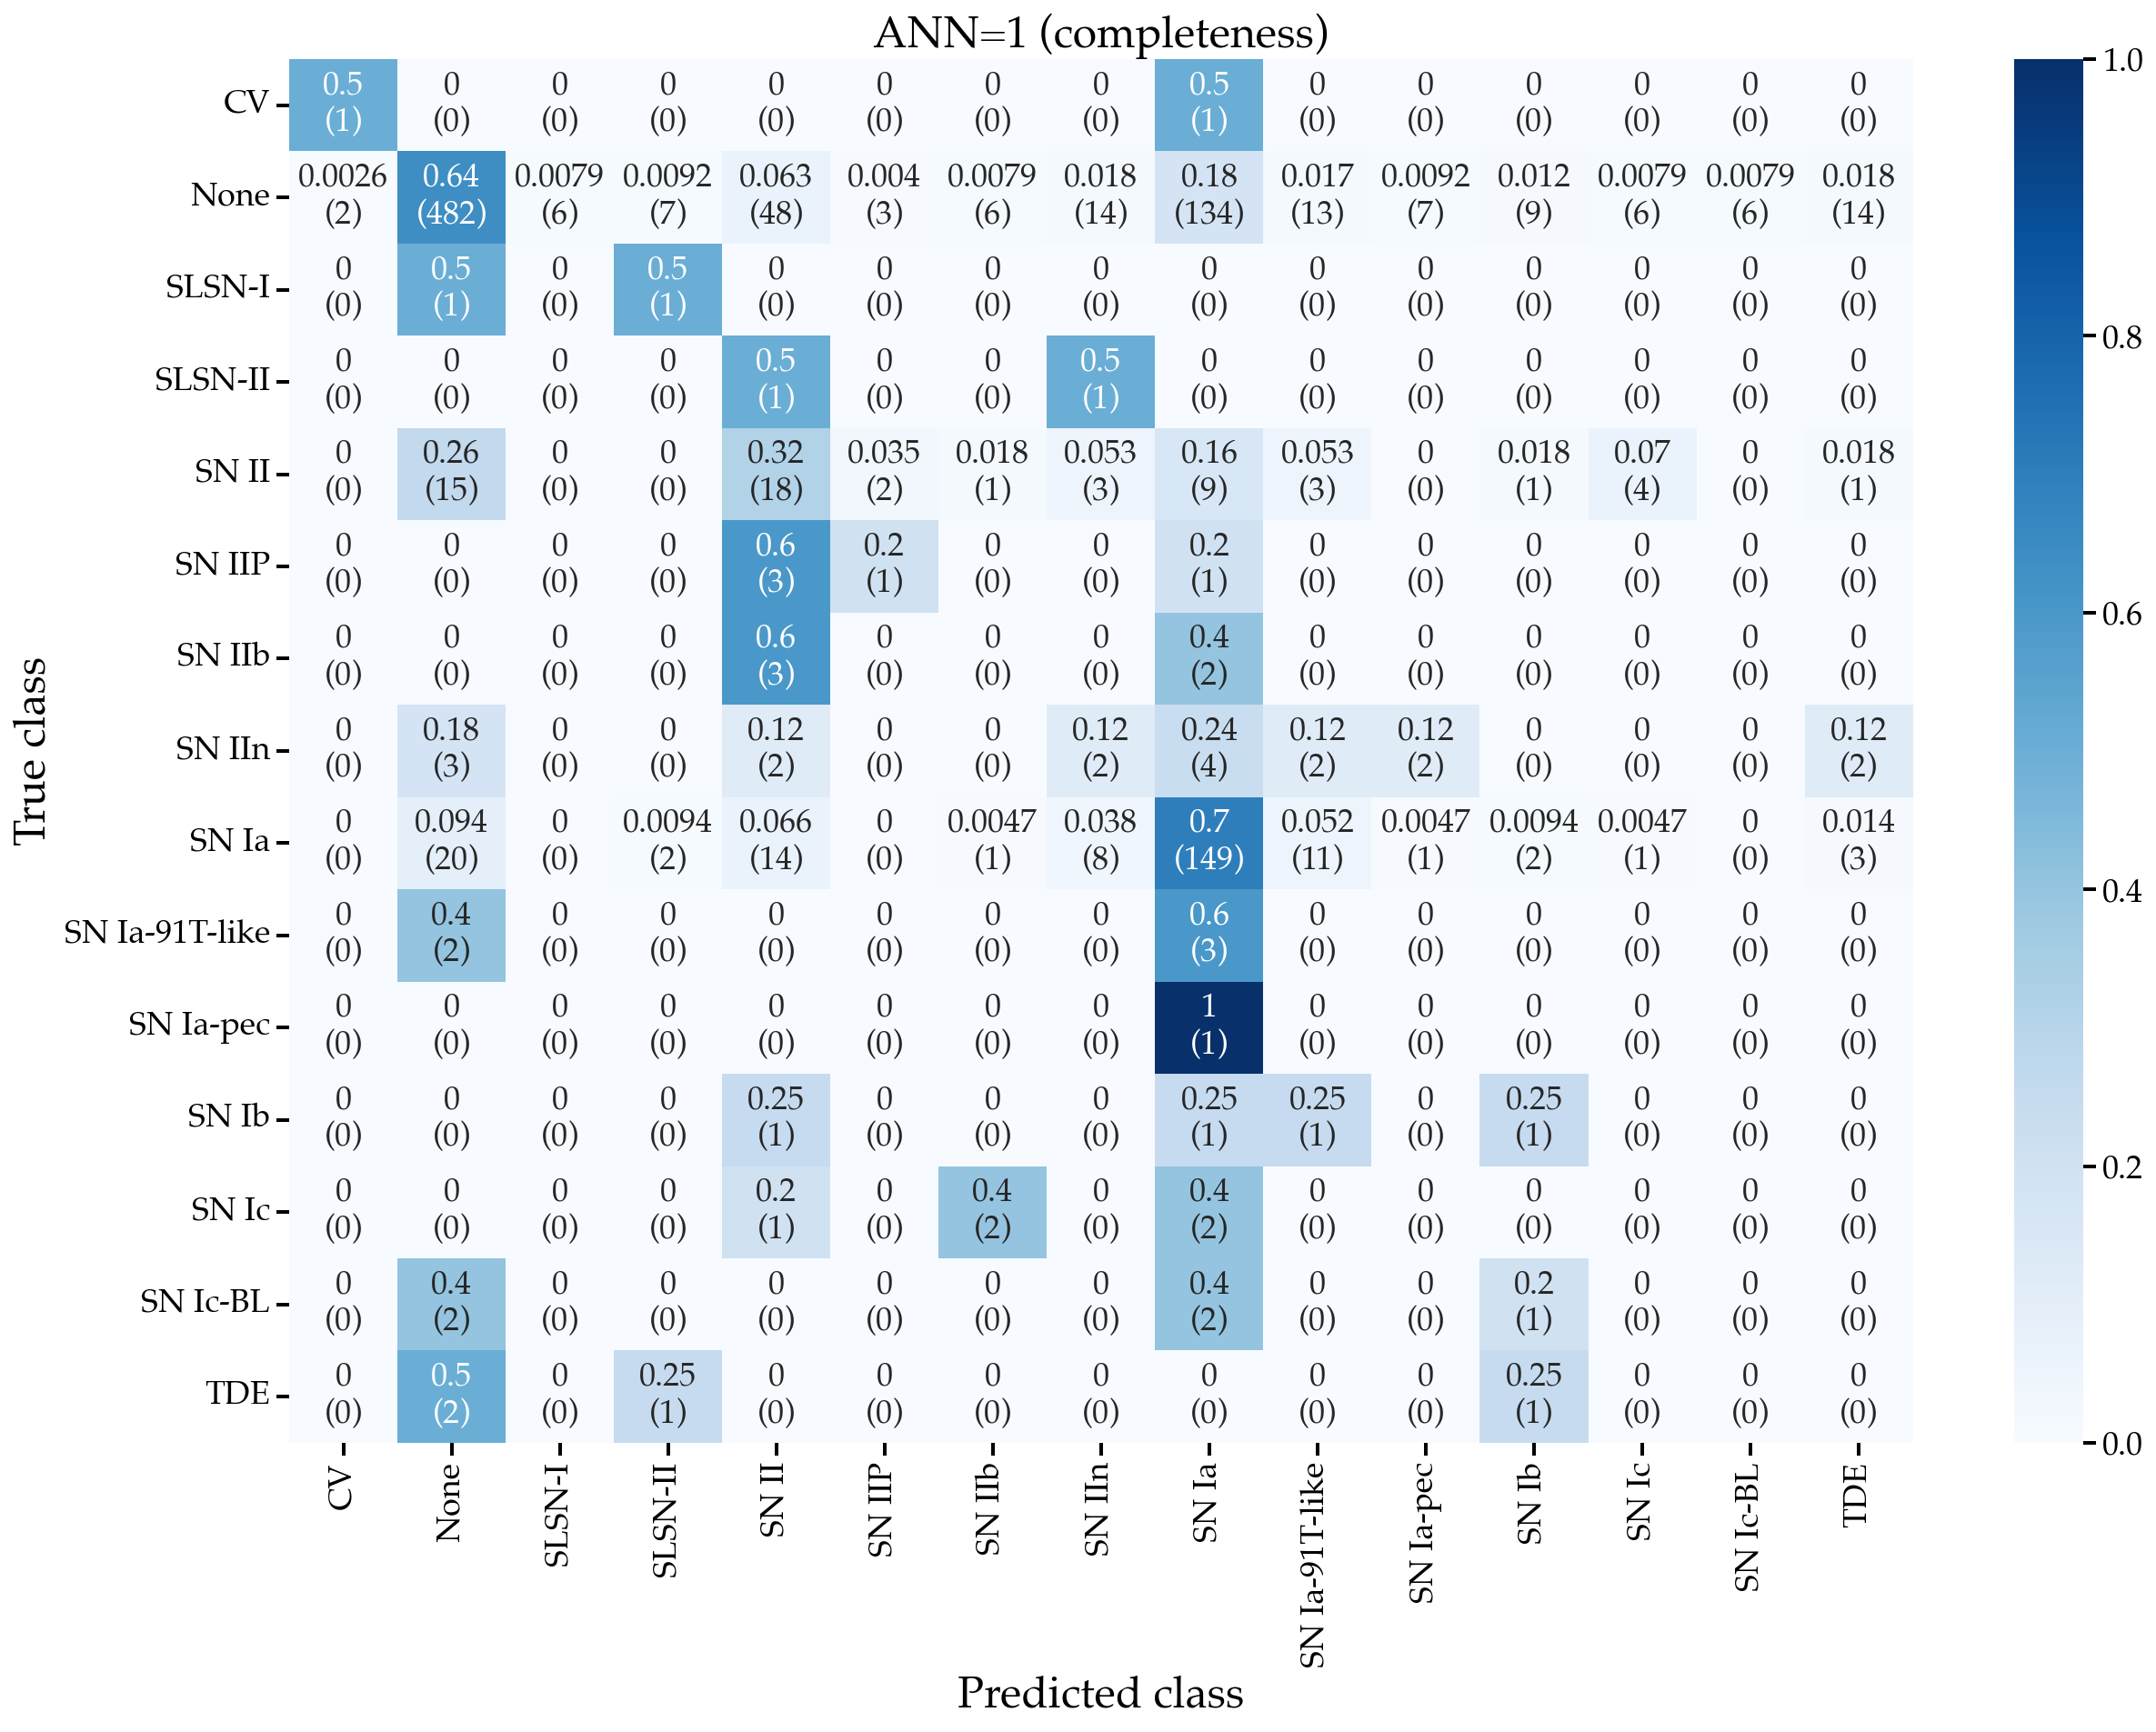

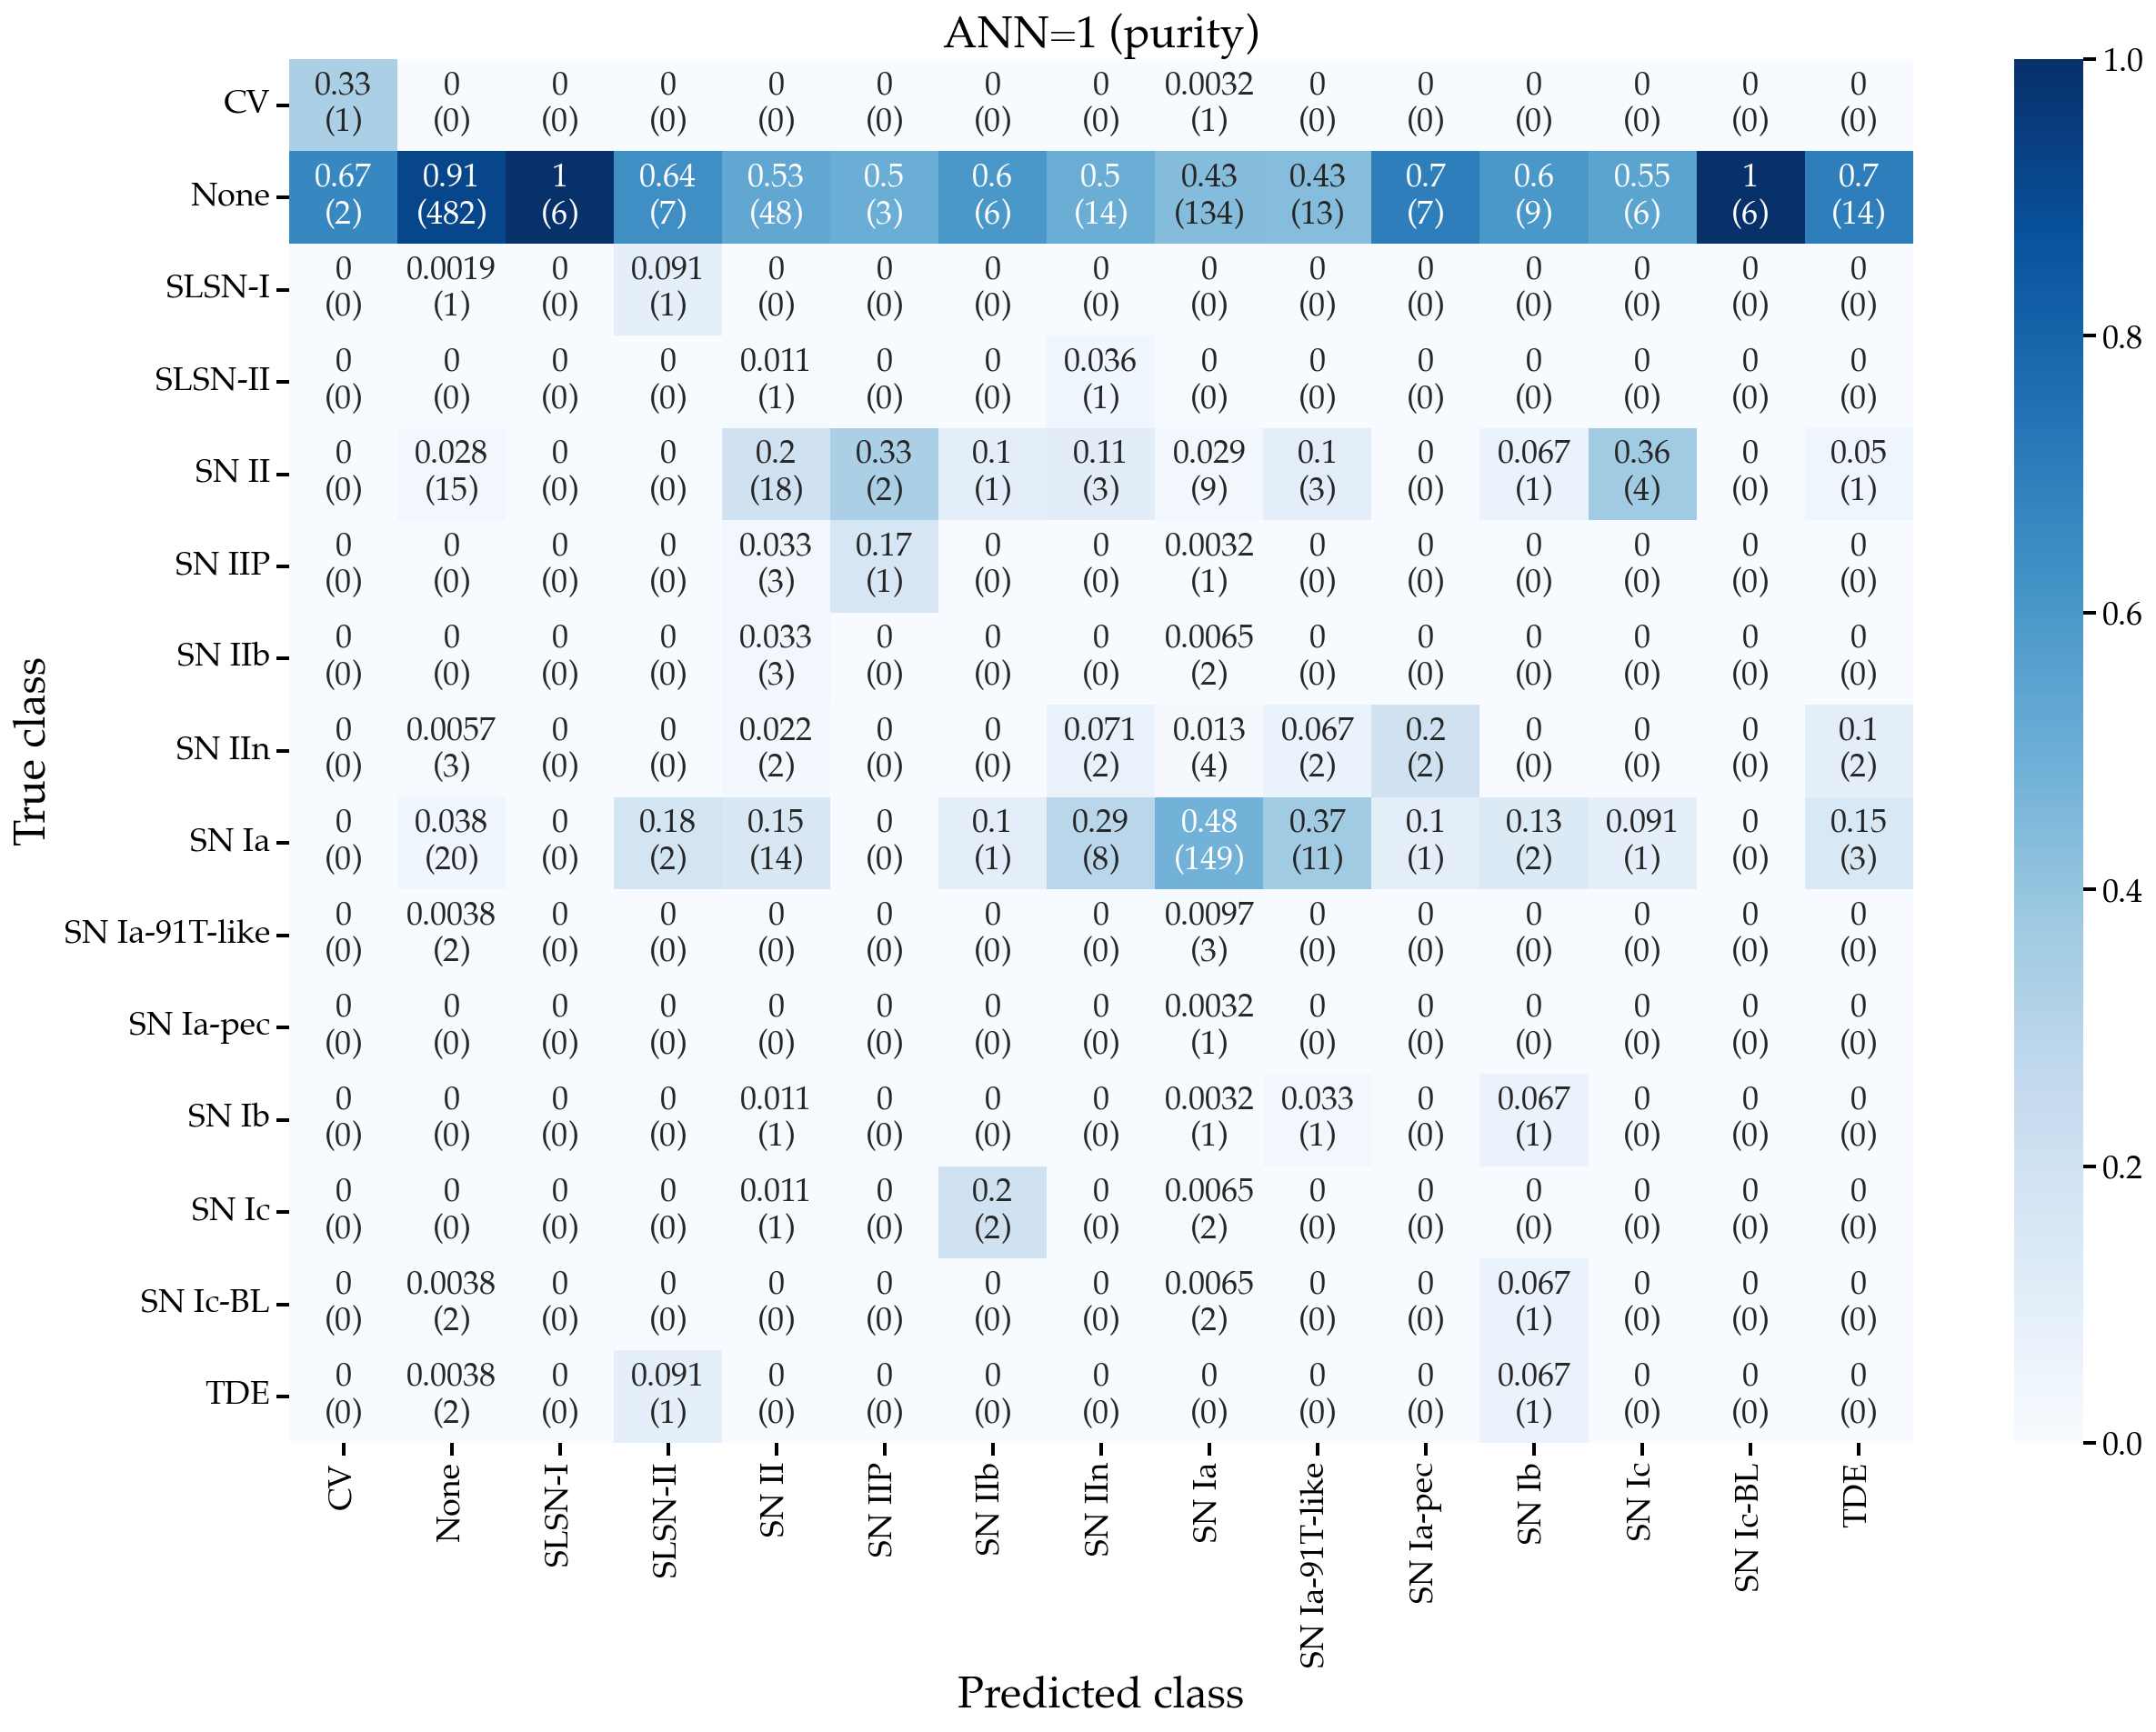

In [6]:
# Confusion matrices
df = ann0_ann1_df
true_labels = np.array(df['ann=0_tns_cls'])
predicted_labels = np.array(df['ann=1_tns_cls'])
# define the class labels
class_names = np.unique(true_labels)
nclasses = len(class_names)

KINDS = ['completeness', 'purity']
for KIND in KINDS:
    # Sims test set
    plot_conf_matrix(true_labels, predicted_labels, labels=class_names, 
             title=f'ANN=1 ({KIND})', kind=KIND)
    plt.savefig(f'../figures/graphs/{suffix}/confmatrix_nclasses={nclasses}_{KIND}.jpg', dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()

### replace None with first ANN class that is not None

In [7]:
def find_first_class_after_None_label_df(df, ann_num):
    # loop through each row
    for index, row in df.iterrows():
        # check if "None" is present in "ann=1_tns_cls"
        if row["ann=1_tns_cls"] == "None":
            # loop through the subsequent columns
            for col in df.columns[2:]:
                # check if the value is not "None"
                if row[col] != "None":
                    # update the value of "ann=1_tns_cls" with the first non-"None" value found
                    df.loc[index, "ann=1_tns_cls"] = row[col]
                    # break out of the loop and move to the next row
                    break
    # replace any remaining "None" values with NaN
    #df.replace("None", np.nan, inplace=True)

    df = df.iloc[:, :ann_num]
    return df

In [8]:
full_ann_tns_cls_df = full_ann_properties_df.iloc[:, 303:404]

ann0_ann1_df_replaceNone = find_first_class_after_None_label_df(df=full_ann_tns_cls_df, ann_num=2)
ann0_ann1_df_replaceNone

,ann=0_tns_cls,ann=1_tns_cls
ZTF20acpmeuc,None,SN Ia
ZTF20acowuix,SN Ia,SN II
ZTF21abfjruq,None,SLSN-II
ZTF22aaaxyzs,SN Ia-pec,SN Ia
ZTF21abnuldi,SN IIb,SN Ia
...,...,...
ZTF20aciymmp,None,TDE
ZTF20acwcfvx,SN Ia,SN Ia
ZTF18adarvpj,None,SN Ia
ZTF21aatrtbu,None,SN Ia


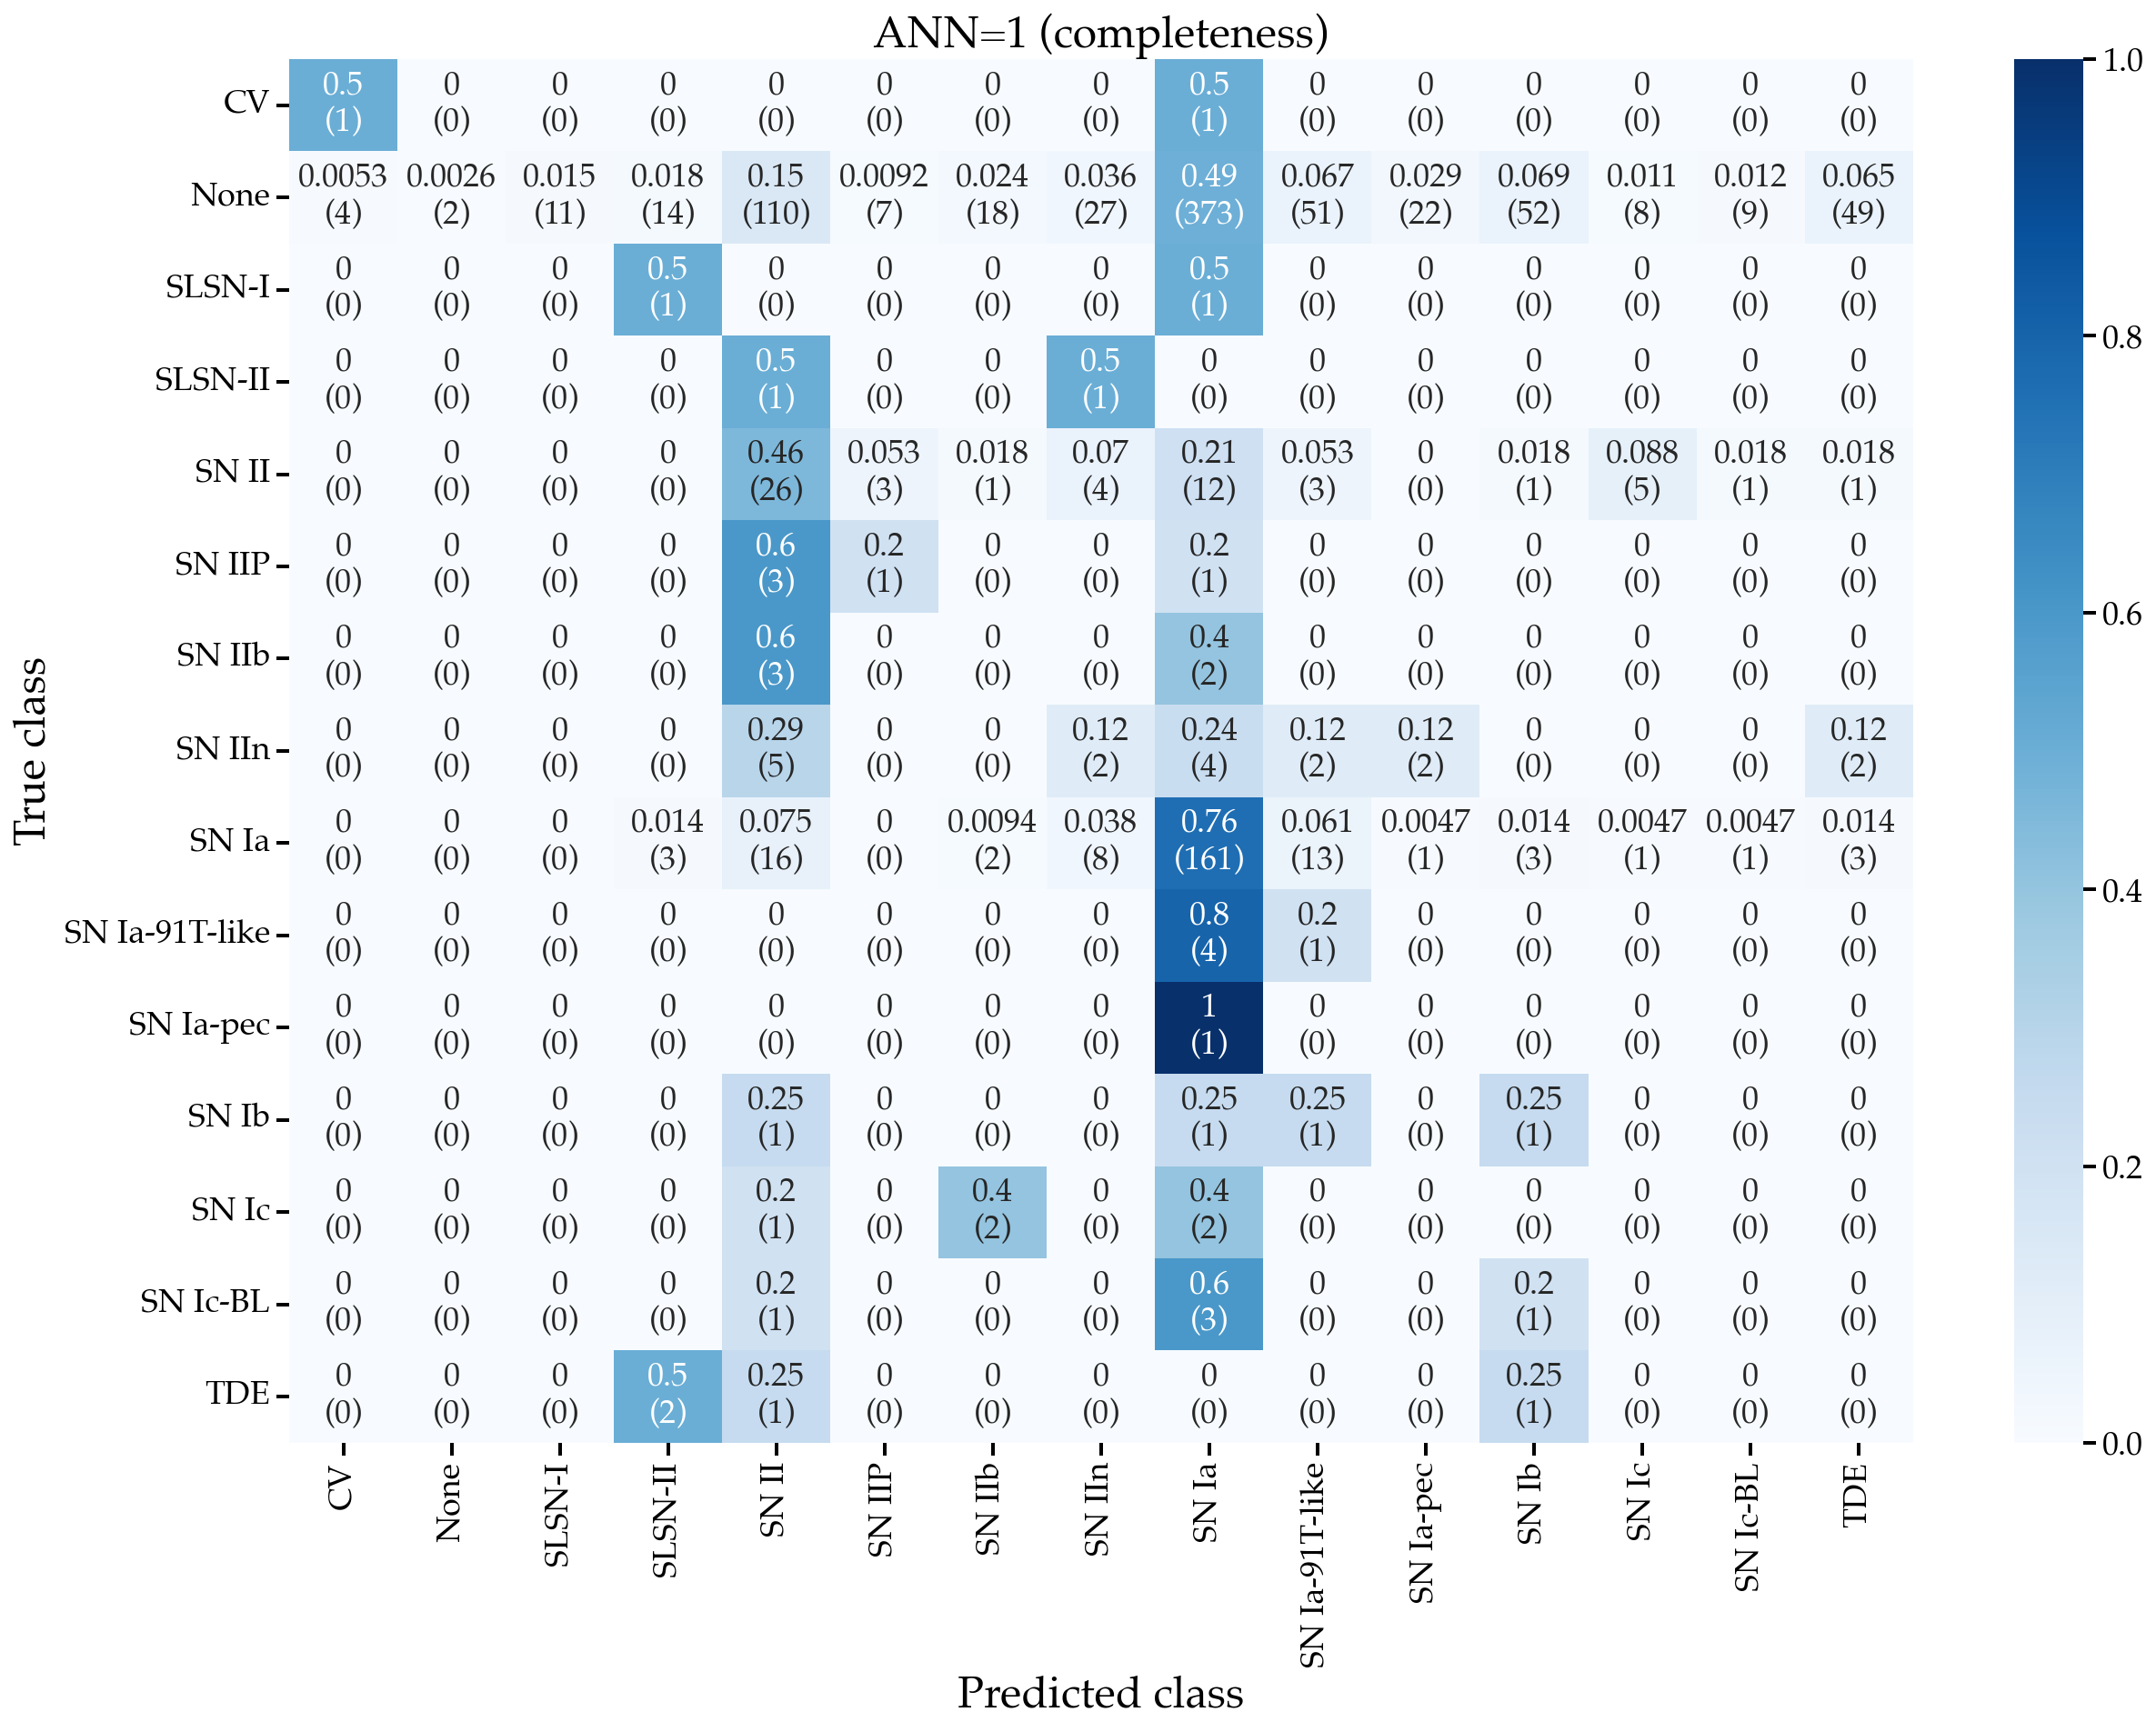

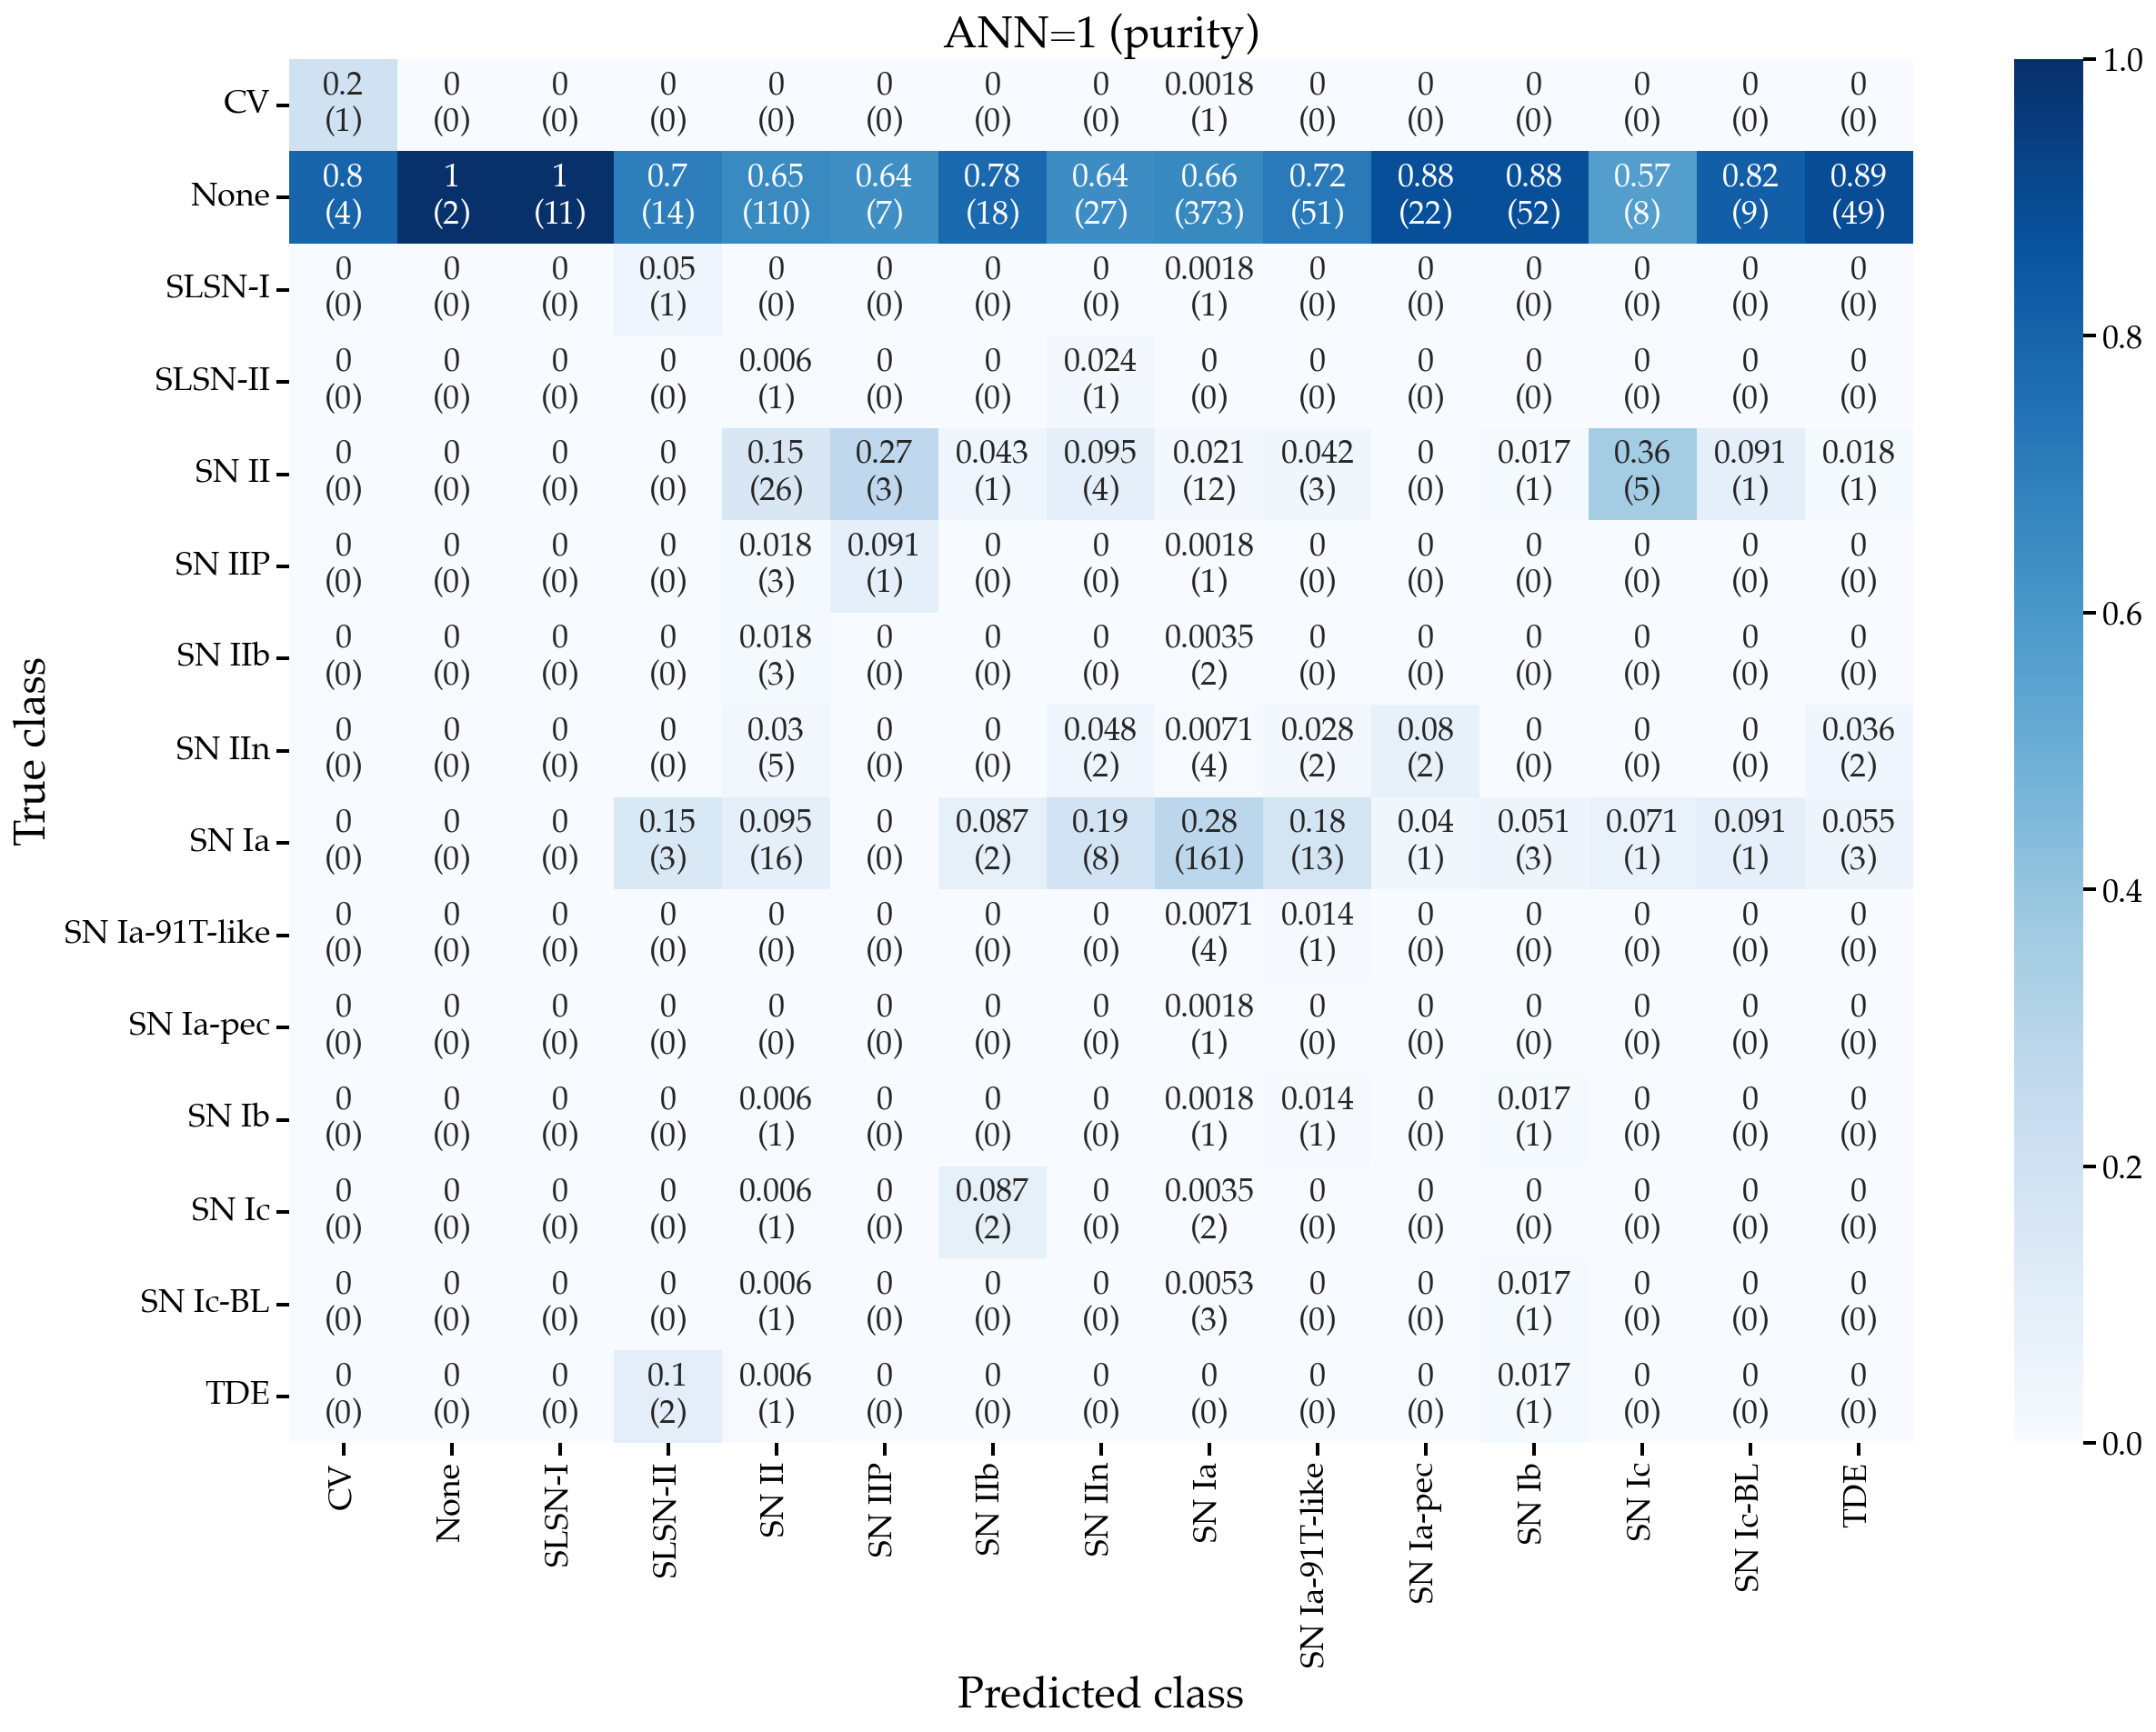

In [9]:
# Confusion matrices
df = ann0_ann1_df_replaceNone
true_labels = np.array(df['ann=0_tns_cls'])
predicted_labels = np.array(df['ann=1_tns_cls'])
# define the class labels
class_names = np.unique(true_labels)
nclasses = len(class_names)

KINDS = ['completeness', 'purity']
for KIND in KINDS:
    # Sims test set
    plot_conf_matrix(true_labels, predicted_labels, labels=class_names, 
             title=f'ANN=1 ({KIND})', kind=KIND)
    plt.savefig(f'../figures/graphs/{suffix}/confmatrix_nclasses={nclasses}_replaceNone_{KIND}.jpg', dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()

### Throw out None altogether

In [10]:
ann0_ann1_df_noNone = ann0_ann1_df[ann0_ann1_df['ann=0_tns_cls'] != 'None']
ann0_ann1_df_noNone

,ann=0_tns_cls,ann=1_tns_cls
ZTF20acowuix,SN Ia,SN II
ZTF22aaaxyzs,SN Ia-pec,SN Ia
ZTF21abnuldi,SN IIb,SN Ia
ZTF18acsofdh,SN Ia,SN Ia
ZTF21abjwvzu,SN Ia,SN IIn
...,...,...
ZTF21abrghol,SN Ia,SN Ia-91T-like
ZTF21aappkns,SN IIn,SN Ia-pec
ZTF21aajvtsq,SN Ia,SN Ia
ZTF21abtxnir,SN Ia,SN Ia


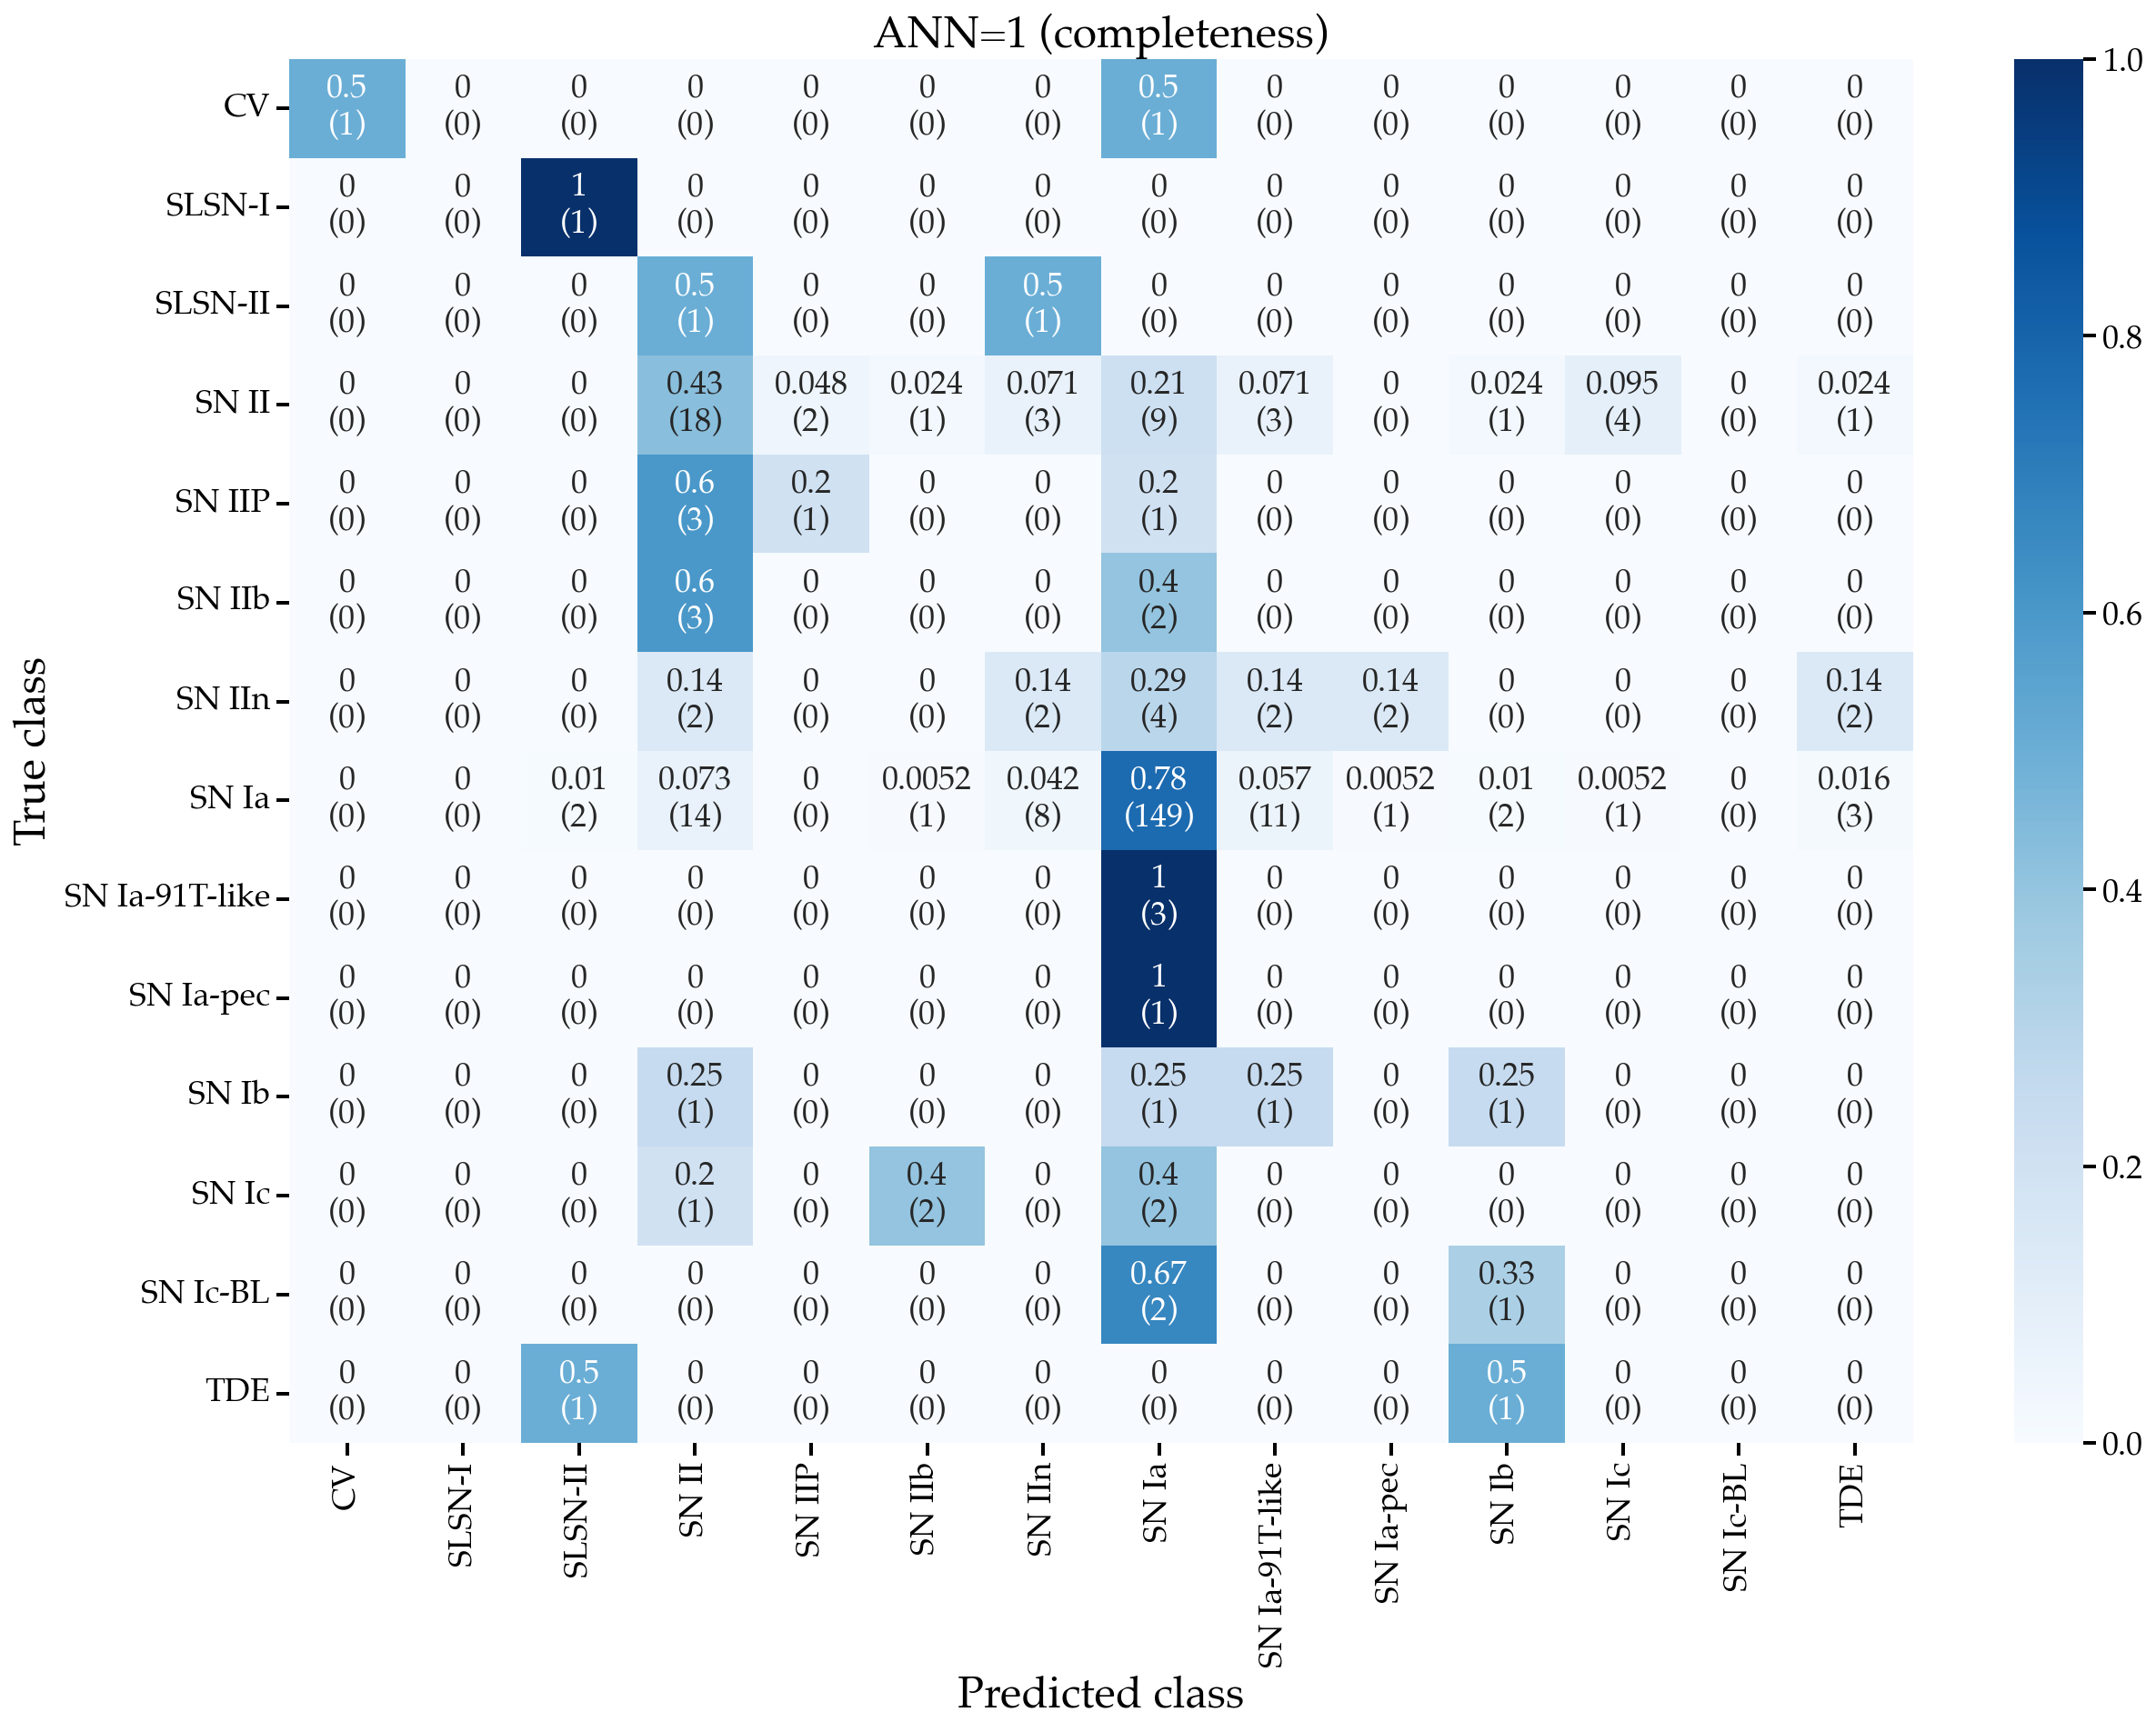

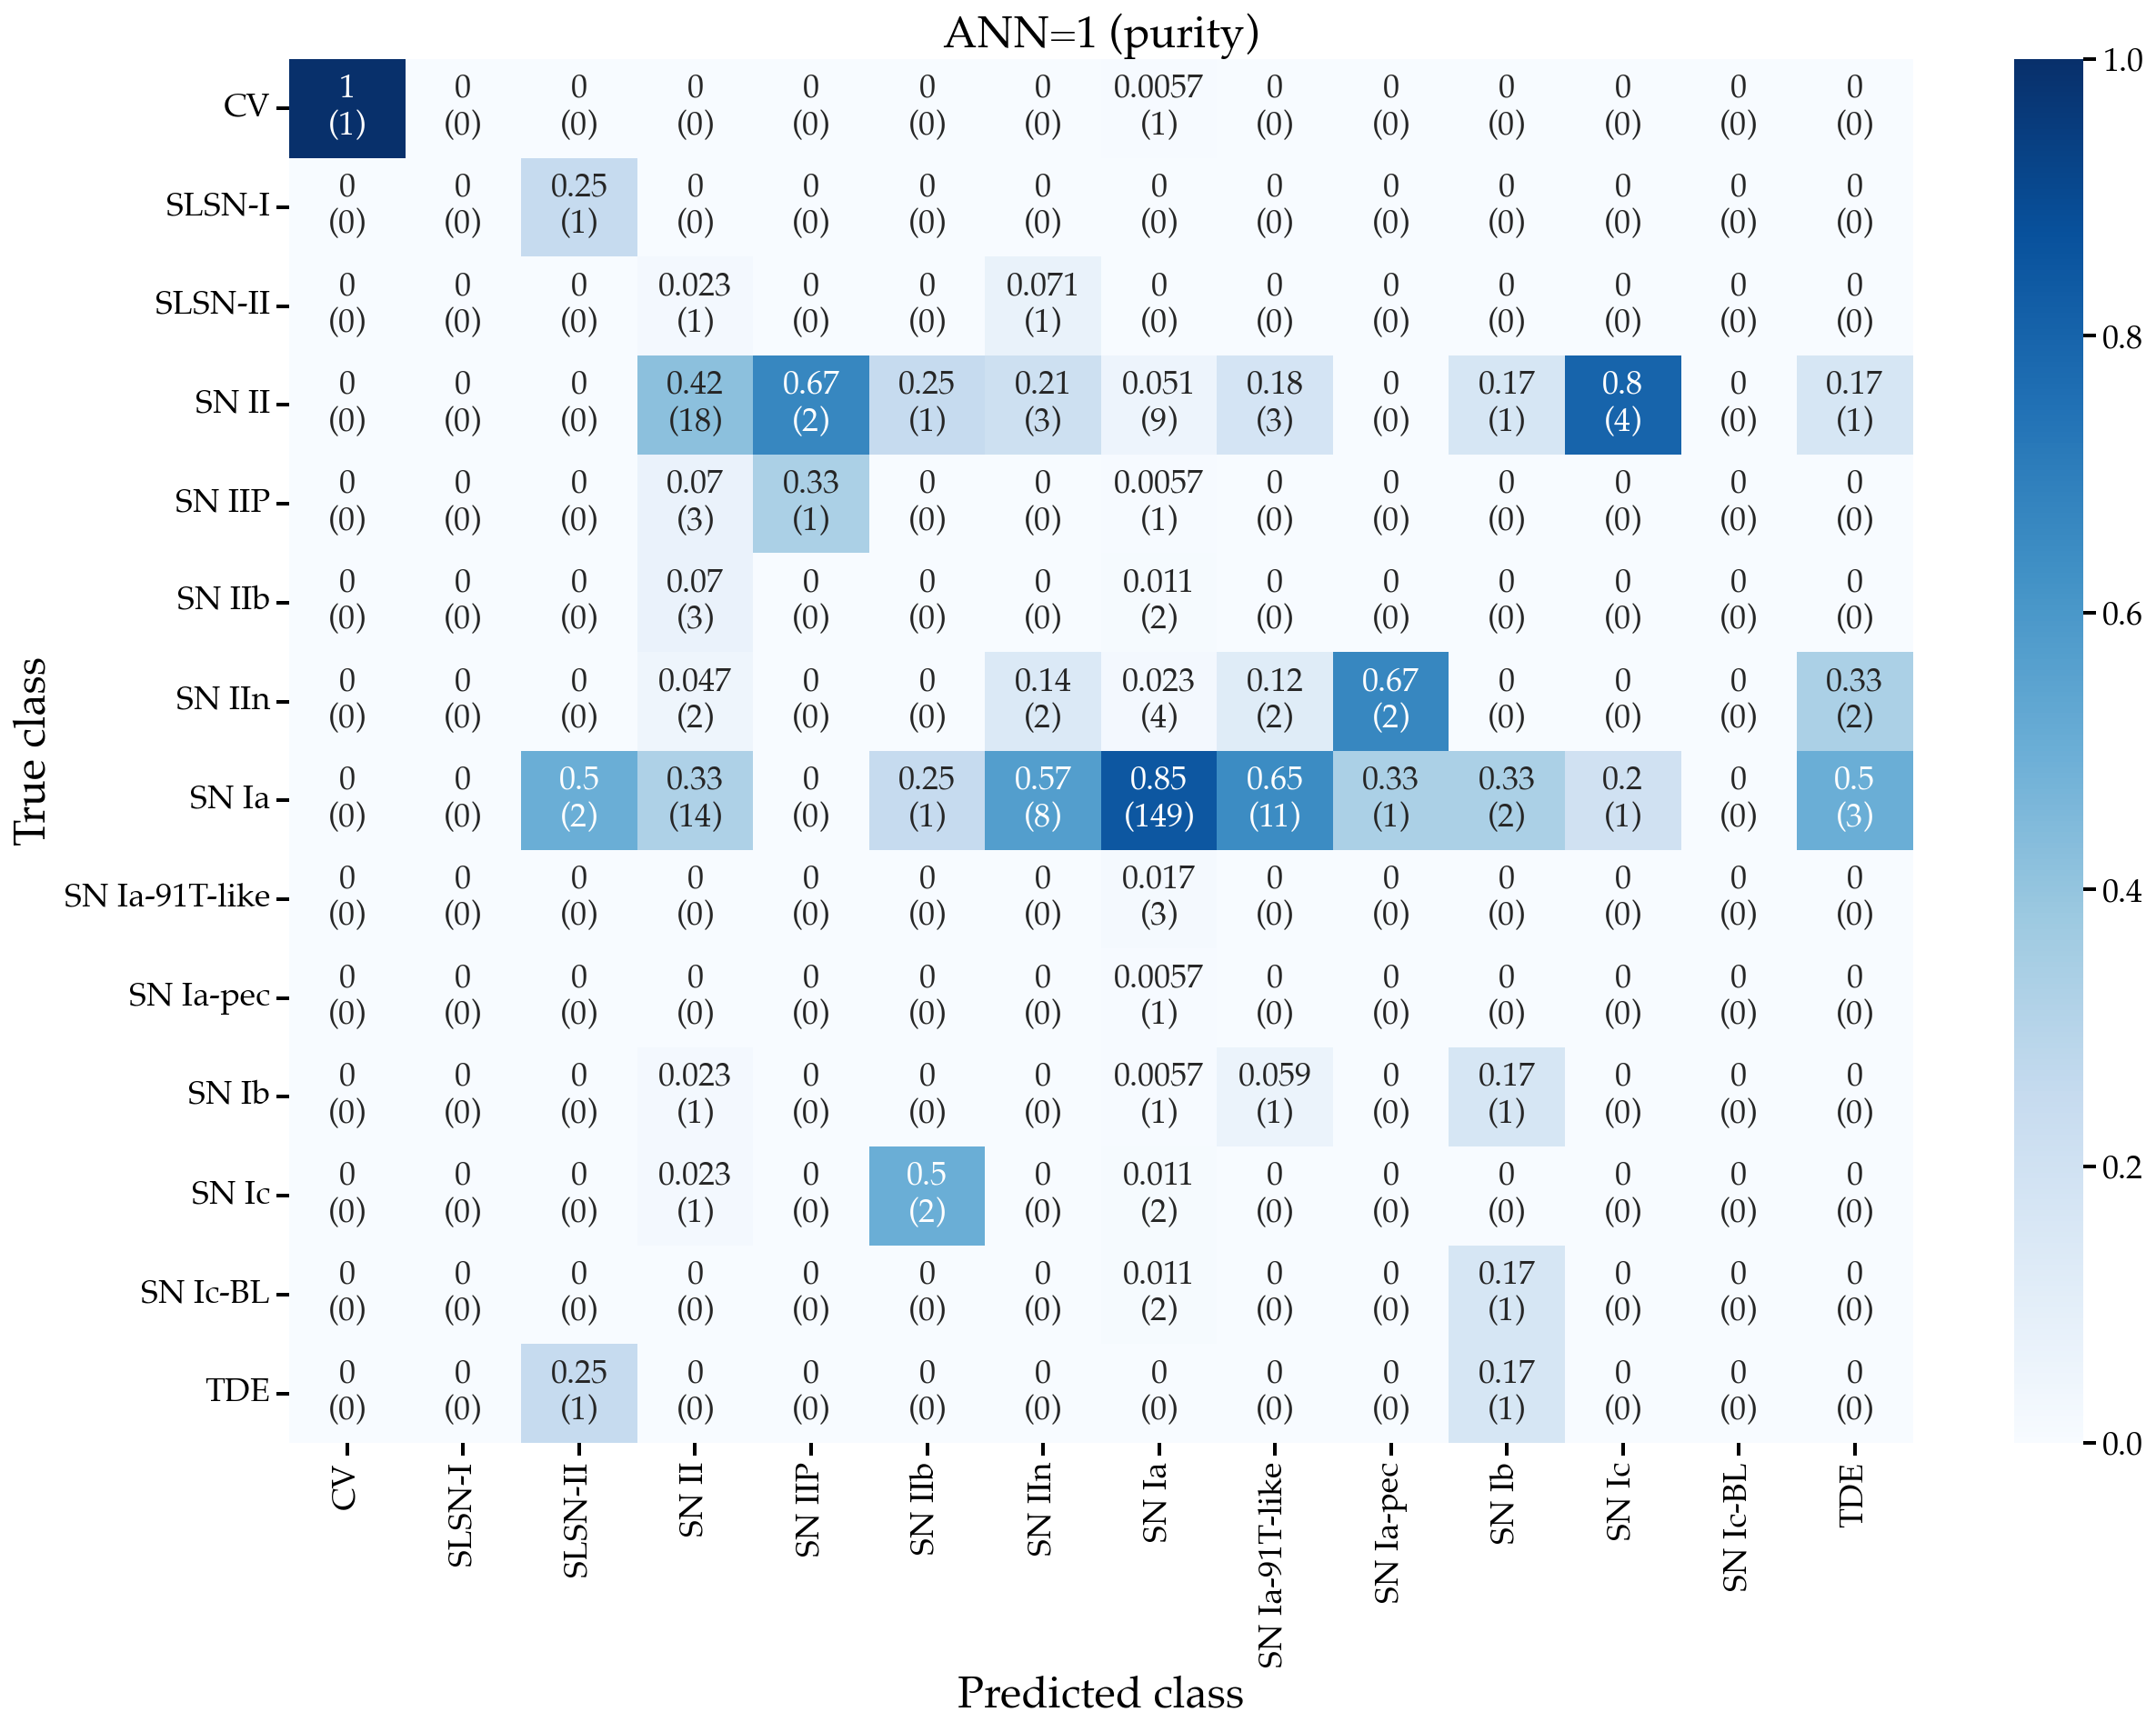

In [11]:
# Confusion matrices
df = ann0_ann1_df_noNone
true_labels = np.array(df['ann=0_tns_cls'])
predicted_labels = np.array(df['ann=1_tns_cls'])
# define the class labels
class_names = np.unique(true_labels)
nclasses = len(class_names)

KINDS = ['completeness', 'purity']
for KIND in KINDS:
    # Sims test set
    plot_conf_matrix(true_labels, predicted_labels, labels=class_names, 
             title=f'ANN=1 ({KIND})', kind=KIND)
    plt.savefig(f'../figures/graphs/{suffix}/confmatrix_nclasses={nclasses}_noNone_{KIND}.jpg', dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()

### Group by similar classes
#### I.e. Ia-norm, Ia-pec, Ia-91T --> Ia

In [12]:
class_names

array(['CV', 'SLSN-I', 'SLSN-II', 'SN II', 'SN IIP', 'SN IIb', 'SN IIn',
       'SN Ia', 'SN Ia-91T-like', 'SN Ia-pec', 'SN Ib', 'SN Ic',
       'SN Ic-BL', 'TDE'], dtype=object)

In [13]:
sim_class_di = {'CV': 'CV', 
      'SLSN-I': 'SLSN', 
      'SLSN-II': 'SLSN', 
      'SN II': 'SN II', 
      'SN IIP': 'SN II', 
      'SN IIb': 'SN II', 
      'SN IIn': 'SN II',
      'SN Ia': 'SN Ia', 
      'SN Ia-91T-like': 'SN Ia', 
      'SN Ia-pec': 'SN Ia', 
      'SN Ib': 'SN Ibc', 
      'SN Ic': 'SN Ibc',
      'SN Ic-BL': 'SN Ibc', 
      'TDE': 'TDE',
      'None': 'None'}

ann0_ann1_df_noNone_sim_class = ann0_ann1_df_noNone.copy()
ann0_ann1_df_noNone_sim_class['ann=0_tns_cls'] = ann0_ann1_df_noNone_sim_class['ann=0_tns_cls'].map(sim_class_di)
ann0_ann1_df_noNone_sim_class['ann=1_tns_cls'] = ann0_ann1_df_noNone_sim_class['ann=1_tns_cls'].map(sim_class_di)

In [14]:
ann0_ann1_df_noNone_sim_class

,ann=0_tns_cls,ann=1_tns_cls
ZTF20acowuix,SN Ia,SN II
ZTF22aaaxyzs,SN Ia,SN Ia
ZTF21abnuldi,SN II,SN Ia
ZTF18acsofdh,SN Ia,SN Ia
ZTF21abjwvzu,SN Ia,SN II
...,...,...
ZTF21abrghol,SN Ia,SN Ia
ZTF21aappkns,SN II,SN Ia
ZTF21aajvtsq,SN Ia,SN Ia
ZTF21abtxnir,SN Ia,SN Ia


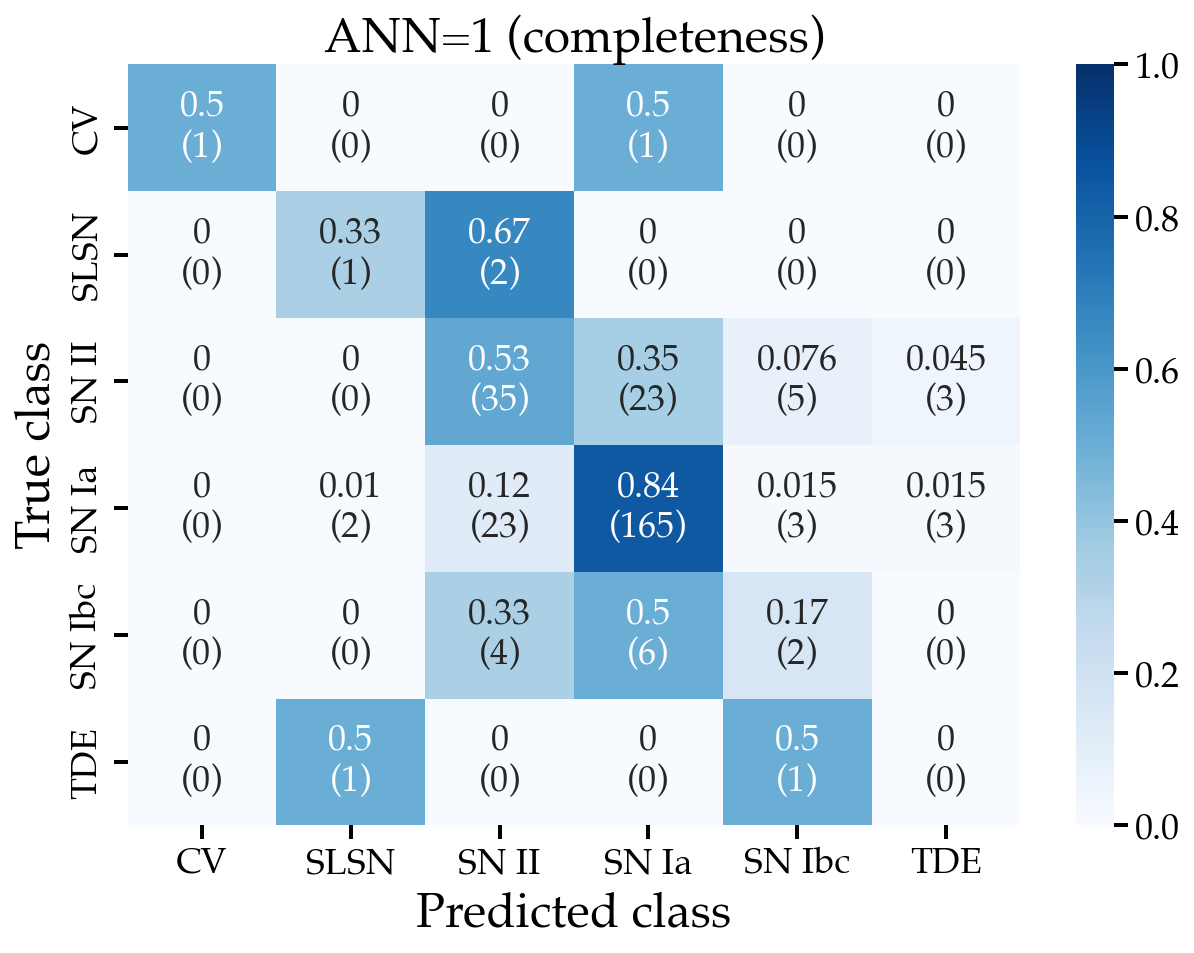

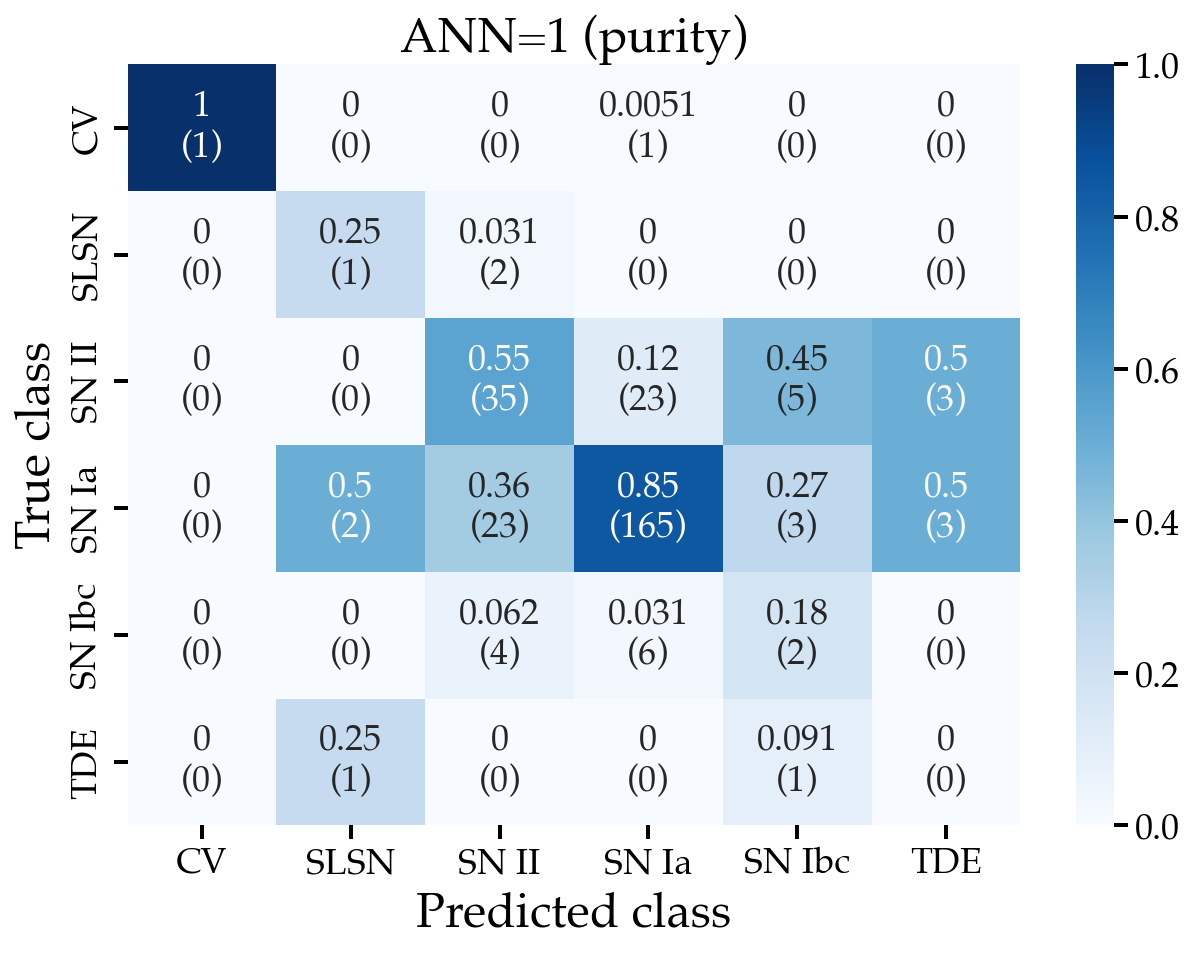

In [15]:
# Confusion matrices
df = ann0_ann1_df_noNone_sim_class
true_labels = np.array(df['ann=0_tns_cls'])
predicted_labels = np.array(df['ann=1_tns_cls'])
# define the class labels
class_names = np.unique(true_labels)
nclasses = len(class_names)

KINDS = ['completeness', 'purity']
for KIND in KINDS:
    # Sims test set
    plot_conf_matrix(true_labels, predicted_labels, labels=class_names, 
             title=f'ANN=1 ({KIND})', kind=KIND, figsize=(10, 7))
    plt.savefig(f'../figures/graphs/{suffix}/confmatrix_nclasses={nclasses}_noNone_similar_class_{KIND}.jpg', dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()

In [16]:
### CC vs Ia vs Exotic (TDE, SLSN)

bin_class_di = {'CV': 'CV', 
      'SLSN-I': 'Exotic', 
      'SLSN-II': 'Exotic', 
      'SN II': 'SN CC', 
      'SN IIP': 'SN CC', 
      'SN IIb': 'SN CC', 
      'SN IIn': 'SN CC',
      'SN Ia': 'SN Ia', 
      'SN Ia-91T-like': 'SN Ia', 
      'SN Ia-pec': 'SN Ia', 
      'SN Ib': 'SN CC', 
      'SN Ic': 'SN CC',
      'SN Ic-BL': 'SN CC', 
      'TDE': 'Exotic',
      'None': 'None'}

ann0_ann1_df_noNone_bin_class = ann0_ann1_df_noNone.copy()
ann0_ann1_df_noNone_bin_class['ann=0_tns_cls'] = ann0_ann1_df_noNone_bin_class['ann=0_tns_cls'].map(bin_class_di)
ann0_ann1_df_noNone_bin_class['ann=1_tns_cls'] = ann0_ann1_df_noNone_bin_class['ann=1_tns_cls'].map(bin_class_di)

In [17]:
ann0_ann1_df_noNone_bin_class

,ann=0_tns_cls,ann=1_tns_cls
ZTF20acowuix,SN Ia,SN CC
ZTF22aaaxyzs,SN Ia,SN Ia
ZTF21abnuldi,SN CC,SN Ia
ZTF18acsofdh,SN Ia,SN Ia
ZTF21abjwvzu,SN Ia,SN CC
...,...,...
ZTF21abrghol,SN Ia,SN Ia
ZTF21aappkns,SN CC,SN Ia
ZTF21aajvtsq,SN Ia,SN Ia
ZTF21abtxnir,SN Ia,SN Ia


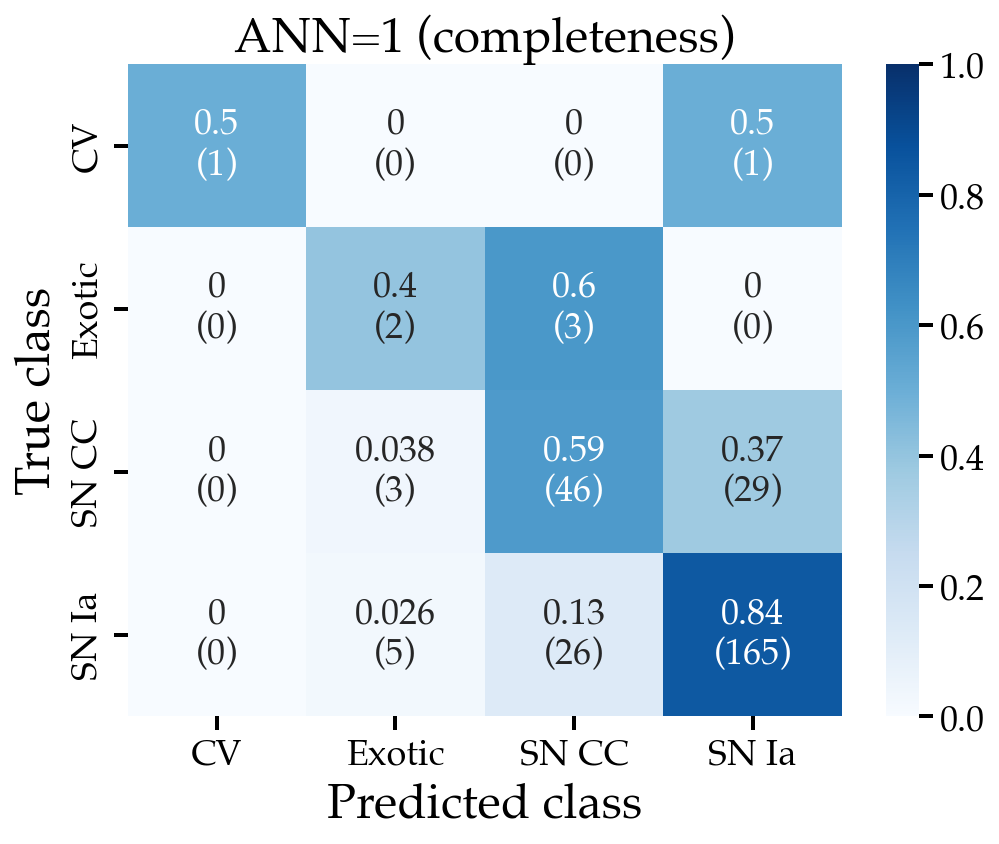

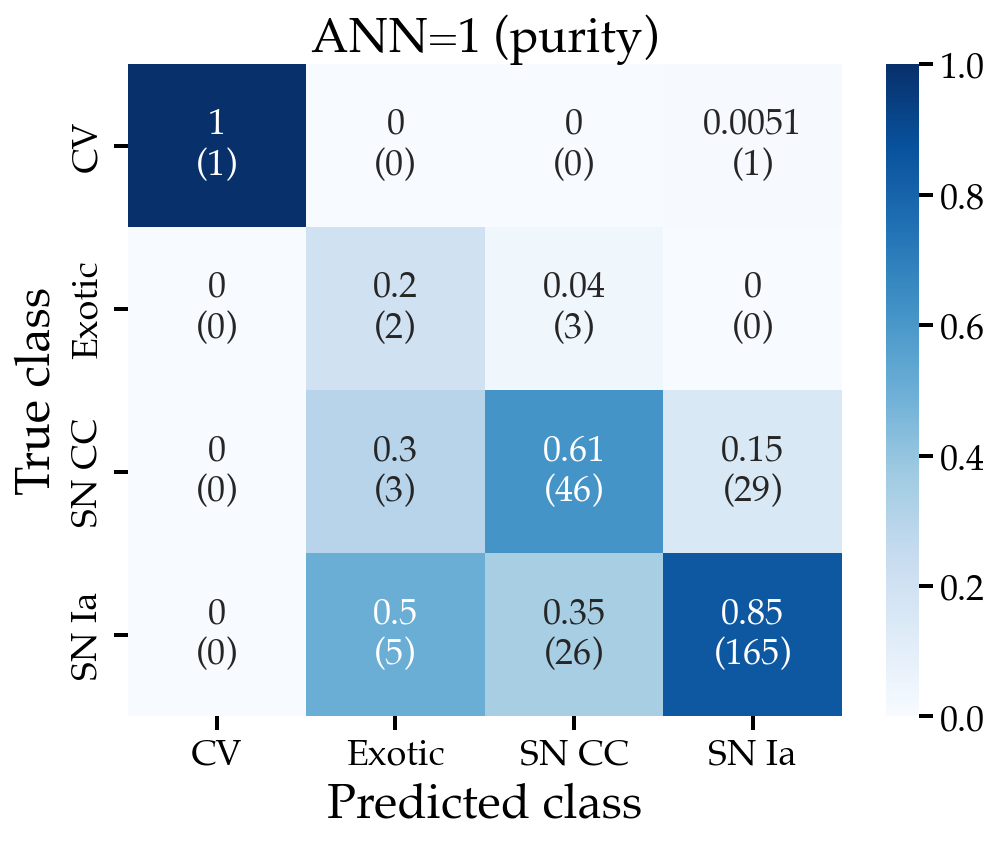

In [18]:
# Confusion matrices
df = ann0_ann1_df_noNone_bin_class
true_labels = np.array(df['ann=0_tns_cls'])
predicted_labels = np.array(df['ann=1_tns_cls'])
# define the class labels
class_names = np.unique(true_labels)
nclasses = len(class_names)

KINDS = ['completeness', 'purity']
for KIND in KINDS:
    # Sims test set
    plot_conf_matrix(true_labels, predicted_labels, labels=class_names, 
             title=f'ANN=1 ({KIND})', kind=KIND, figsize=(8, 6))
    plt.savefig(f'../figures/graphs/{suffix}/confmatrix_nclasses={nclasses}_noNone_binary_class_{KIND}.jpg', dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()

### Rare vs Non rare classes (basically not-Ia-norm vs Ia-norm)

In [19]:
rare_v_not_class_di = {'CV': 'Rare', 
      'SLSN-I': 'Rare', 
      'SLSN-II': 'Rare', 
      'SN II': 'Rare', 
      'SN IIP': 'Rare', 
      'SN IIb': 'Rare', 
      'SN IIn': 'Rare',
      'SN Ia': 'NOT Rare', 
      'SN Ia-91T-like': 'Rare', 
      'SN Ia-pec': 'Rare', 
      'SN Ib': 'Rare', 
      'SN Ic': 'Rare',
      'SN Ic-BL': 'Rare', 
      'TDE': 'Rare',
      'None': 'NOT Rare'}

ann0_ann1_df_noNone_rare_v_not_class = ann0_ann1_df_noNone.copy()
ann0_ann1_df_noNone_rare_v_not_class['ann=0_tns_cls'] = ann0_ann1_df_noNone_rare_v_not_class['ann=0_tns_cls'].map(rare_v_not_class_di)
ann0_ann1_df_noNone_rare_v_not_class['ann=1_tns_cls'] = ann0_ann1_df_noNone_rare_v_not_class['ann=1_tns_cls'].map(rare_v_not_class_di)

In [20]:
ann0_ann1_df_noNone_rare_v_not_class

,ann=0_tns_cls,ann=1_tns_cls
ZTF20acowuix,NOT Rare,Rare
ZTF22aaaxyzs,Rare,NOT Rare
ZTF21abnuldi,Rare,NOT Rare
ZTF18acsofdh,NOT Rare,NOT Rare
ZTF21abjwvzu,NOT Rare,Rare
...,...,...
ZTF21abrghol,NOT Rare,Rare
ZTF21aappkns,Rare,Rare
ZTF21aajvtsq,NOT Rare,NOT Rare
ZTF21abtxnir,NOT Rare,NOT Rare


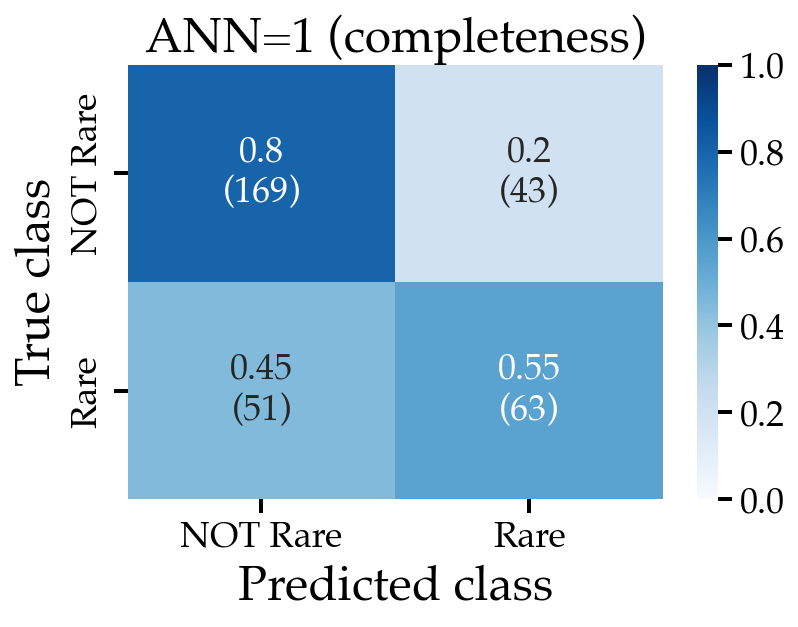

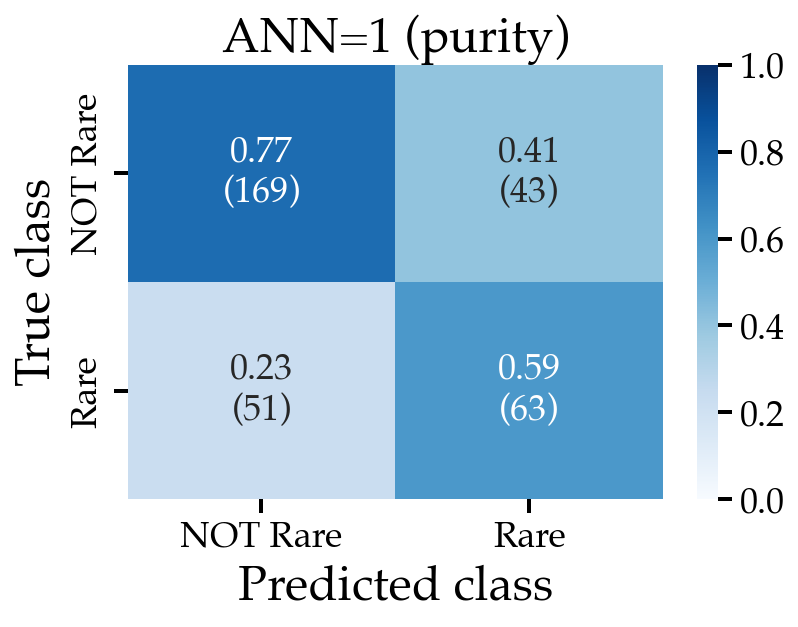

In [21]:
# Confusion matrices
df = ann0_ann1_df_noNone_rare_v_not_class
true_labels = np.array(df['ann=0_tns_cls'])
predicted_labels = np.array(df['ann=1_tns_cls'])
# define the class labels
class_names = np.unique(true_labels)
nclasses = len(class_names)

KINDS = ['completeness', 'purity']
for KIND in KINDS:
    # Sims test set
    plot_conf_matrix(true_labels, predicted_labels, labels=class_names, 
             title=f'ANN=1 ({KIND})', kind=KIND, figsize=(6, 4))
    plt.savefig(f'../figures/graphs/{suffix}/confmatrix_nclasses={nclasses}_noNone_rare_v_not_class_{KIND}.jpg', dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()